# Hands-On Pertemuan 14: Advanced Machine Learning using Spark MLlib

## Objectives:
- Understand and implement advanced machine learning tasks using Spark MLlib.
- Build and evaluate models using real-world datasets.
- Explore techniques like feature engineering and hyperparameter tuning.


## Introduction to Spark MLlib
Spark MLlib is a scalable library for machine learning that integrates seamlessly with the Spark ecosystem. It supports a wide range of tasks, including regression, classification, clustering, and collaborative filtering.

In [ ]:
# Example: Linear Regression with Spark MLlib
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('MLlib Example').getOrCreate()

# Load sample data
data = [(1, 5.0, 20.0), (2, 10.0, 25.0), (3, 15.0, 30.0), (4, 20.0, 35.0)]
columns = ['ID', 'Feature', 'Target']
df = spark.createDataFrame(data, columns)

# Prepare data for modeling
assembler = VectorAssembler(inputCols=['Feature'], outputCol='Features')
df_transformed = assembler.transform(df)

# Train a linear regression model
lr = LinearRegression(featuresCol='Features', labelCol='Target')
model = lr.fit(df_transformed)

# Print model coefficients
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')


Coefficients: [0.9999999999999992]
Intercept: 15.000000000000009


In [ ]:
# Practice: Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.linalg import Vectors

# Example dataset
data = [(1, Vectors.dense([2.0, 3.0]), 0),
        (2, Vectors.dense([1.0, 5.0]), 1),
        (3, Vectors.dense([2.5, 4.5]), 1),
        (4, Vectors.dense([3.0, 6.0]), 0)]
columns = ['ID', 'Features', 'Label']
df = spark.createDataFrame(data, columns)

# Train logistic regression model
lr = LogisticRegression(featuresCol='Features', labelCol='Label')
model = lr.fit(df)

# Display coefficients and summary
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')


Coefficients: [-12.262057929180484,4.087352266486688]
Intercept: 11.56891272665312


In [ ]:
# Practice: KMeans Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors

# Example dataset
data = [(1, Vectors.dense([1.0, 1.0])),
        (2, Vectors.dense([5.0, 5.0])),
        (3, Vectors.dense([10.0, 10.0])),
        (4, Vectors.dense([15.0, 15.0]))]
columns = ['ID', 'Features']
df = spark.createDataFrame(data, columns)

# Train KMeans clustering model
kmeans = KMeans(featuresCol='Features', k=2)
model = kmeans.fit(df)

# Show cluster centers
centers = model.clusterCenters()
print(f'Cluster Centers: {centers}')


Cluster Centers: [array([3., 3.]), array([12.5, 12.5])]


## Homework
- Load a real-world dataset into Spark and prepare it for machine learning tasks.
- Build a classification model using Spark MLlib and evaluate its performance.
- Explore hyperparameter tuning using cross-validation.


In [ ]:
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Mental Health Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
df['self_employed'].fillna('Unknown', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            292364 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 2,313
Percentage of duplicates: 0.8%


In [ ]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,3,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [ ]:
df.drop_duplicates(inplace = True)

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


In [ ]:
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,39,0,34,1,1,0,1,0,2,1,2,2,0,1,2,1,1
1,41,0,34,1,1,1,1,0,2,1,2,2,0,1,2,1,0
2,42,0,34,1,1,1,1,0,2,1,2,2,0,1,2,1,2
3,47,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,52,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2


In [ ]:
X = encoded_df.drop("Mood_Swings", axis = 1)

y = encoded_df["Mood_Swings"]
y

,Mood_Swings
0,2
1,2
2,2
3,2
4,2
...,...
292359,1
292360,1
292361,1
292362,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(232040, 16) (58011, 16)
(232040,) (58011,)


In [ ]:
def pipeline_classification(pipelines):
  """
  Performs classification using cross-validation, evaluates different models,
  and makes predictions for each model on the test set.

  Args:
      pipelines (list): List of tuples containing model names and pipeline objects.

  Returns:
      pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                        and a dictionary with test set predictions for each model.
  """

  # Initialize lists to store results
  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  # Perform cross-validation and store results
  for name, pipe in pipelines:
      # Fit the pipeline to the training data
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)

      # Make predictions on the test set and store them
      model_predictions[name] = pipe.predict(X_test)

      # Calculate probabilities on the test set and store them
      model_probabilities[name] = pipe.predict_proba(X_test)

  # Plot the results
  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  # Convert results to a DataFrame
  results_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_df, model_predictions, model_probabilities

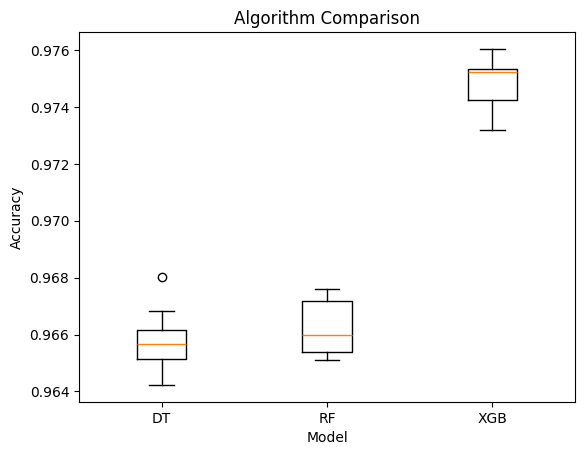

,Model,Mean Accuracy,Standard Deviation
0,DT,0.965812,0.001000
1,RF,0.966260,0.000949
2,XGB,0.974819,0.000935


In [ ]:
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
    ('XGB', Pipeline([('XGB', XGBClassifier())])),
  ]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_df
